# 📊 Data Understanding & Preparation - Student Performance Dataset

# 🧠 TUGAS BESAR DATA MINING

## 📚 Topik: *Klasifikasi Kelulusan Mahasiswa Berdasarkan Performa Akademik*

---

### 👥 Kelompok: 9 [14, 27, 35]
- Difa Ramadhan (220102023) – Tugas: Data Understanding & Preparation
- Nabila Tsari Aulia Mahmudah (220102064) – Tugas: Modeling & Evaluation
- Siti Arfi (⁠220102082) – Tugas: Deployment / Interpretasi

---

### 🏫 Mata Kuliah: Data Mining  
### 👨‍🏫 Dosen Pengampu: [Fauzan Ramadhan S.Kom., M.Kom.]  
### 📅 Semester: Semester 6 Tahun Ajaran 2025

---

### 📄 Deskripsi Singkat Proyek

Proyek ini bertujuan untuk memprediksi kelulusan mahasiswa (Pass/Fail) berdasarkan data performa akademik dan non-akademik seperti nilai ujian, kehadiran, jam belajar, dan faktor sosial lainnya.  
Analisis dilakukan menggunakan pendekatan **supervised learning**, dengan algoritma klasifikasi karena target berupa kategori (Pass atau Fail).  
Output dari proyek ini diharapkan dapat membantu institusi pendidikan dalam mengidentifikasi mahasiswa yang berpotensi tidak lulus agar dapat dilakukan intervensi lebih awal.

---

# **📦 1. Upload & Ekstrak ZIP**

In [11]:
from google.colab import files
import zipfile

# Upload file ZIP
uploaded = files.upload()

# Ekstrak file ZIP
with zipfile.ZipFile("student_dataset.zip", "r") as zip_ref:
    zip_ref.extractall("data")


Saving student_dataset.zip to student_dataset (1).zip


**🔍 Penjelasan:**


*   files.upload() membuka jendela untuk unggah file dari komputer.
*   zipfile.ZipFile(...).extractall() digunakan untuk mengekstrak isi .zip ke folder bernama data.




# **📄 2. Baca Dataset CSV**

In [12]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file utama
df = pd.read_csv("data/Students Performance Dataset.csv")
df.head()


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


**🔍 Penjelasan:**

*   Membaca file CSV ke dalam DataFrame bernama df.
*   df.head() menampilkan 5 baris pertama untuk cek isi datanya.



# **🎯 3. Buat Kolom Target: Class (Pass/Fail)**

In [13]:
# Buat kolom Class: Fail jika Grade = 'F', sisanya Pass
df["Class"] = df["Grade"].apply(lambda x: "Fail" if x == "F" else "Pass")
df[["Grade", "Class"]].head()


,Grade,Class
0,F,Fail
1,B,Pass
2,D,Pass
3,F,Fail
4,C,Pass


**🔍 Penjelasan:**


*   Membuat kolom baru bernama Class berdasarkan nilai Grade.
*   Nilai F dianggap gagal, sisanya dianggap lulus.

# **📊 4. Statistik Deskriptif**

In [17]:
# 🎯 Pilih fitur yang digunakan
selected_columns = [
    'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg',
    'Quizzes_Avg', 'Projects_Score', 'Participation_Score', 'Total_Score',
    'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Stress_Level (1-10)', 'Class'
]
df = df[selected_columns]

# 🧾 Statistik Deskriptif
descriptive_stats = df.describe()
print(descriptive_stats)

# 🧾 Statistik Deskriptif per Kelas
print("\n📊 Statistik Deskriptif untuk Siswa yang Pass:")
print(df[df['Class'] == 'Pass'].describe())

print("\n📉 Statistik Deskriptif untuk Siswa yang Fail:")
print(df[df['Class'] == 'Fail'].describe())


       Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  \
count     5000.000000    5000.000000  5000.000000      5000.000000   
mean        75.356076      70.701924    69.546552        74.956320   
std         14.392716      17.436325    17.108996        14.404287   
min         50.010000      40.000000    40.010000        50.000000   
25%         62.945000      55.707500    54.697500        62.340000   
50%         75.670000      70.860000    69.485000        75.090000   
75%         87.862500      85.760000    83.922500        87.352500   
max        100.000000      99.990000    99.980000        99.990000   

       Quizzes_Avg  Projects_Score  Participation_Score  Total_Score  \
count  5000.000000      5000.00000          5000.000000  5000.000000   
mean     74.836214        74.78305            49.963720    71.652097   
std      14.423848        14.54243            28.989785     7.230097   
min      50.000000        50.00000             0.000000    50.602000   
25%      

**🔍 Penjelasan:**

Menampilkan statistik dasar: mean, min, max, std dari kolom fitur yang digunakan, yang lulus, dan yang tidak lulus.



# **🔗 5. Korelasi Antar Fitur Numerik**


🔗 Korelasi antar fitur:
                       Attendance (%)  Midterm_Score  Final_Score  \
Attendance (%)               1.000000       0.007881    -0.009300   
Midterm_Score                0.007881       1.000000    -0.004638   
Final_Score                 -0.009300      -0.004638     1.000000   
Assignments_Avg             -0.003600      -0.025153     0.013635   
Quizzes_Avg                 -0.027840      -0.013974     0.004714   
Projects_Score              -0.011101      -0.024138    -0.006563   
Participation_Score          0.009051      -0.017434    -0.011764   
Total_Score                 -0.014165       0.330636     0.588608   
Study_Hours_per_Week         0.011200       0.009096     0.004645   
Sleep_Hours_per_Night        0.003493       0.015053     0.011281   
Stress_Level (1-10)          0.003838       0.035220    -0.004479   
Class_binary                -0.024384       0.195875     0.265293   

                       Assignments_Avg  Quizzes_Avg  Projects_Score  \
Attend

/tmp/ipython-input-19-3857059640.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='crest')


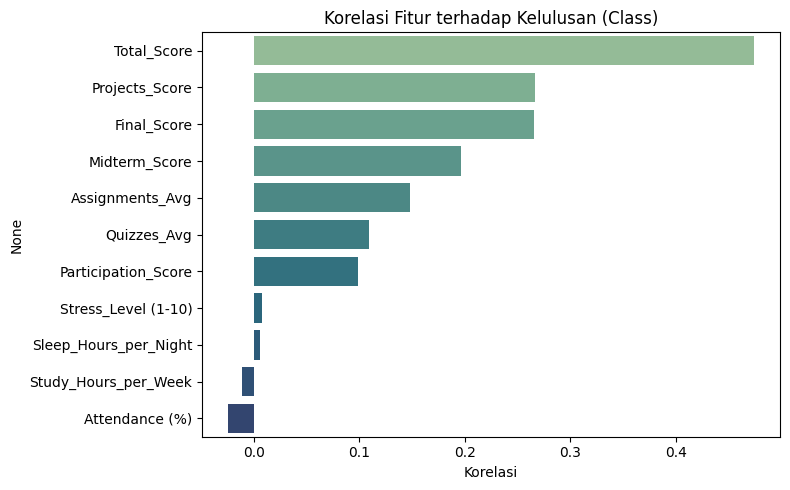

In [19]:
# 📈 Korelasi Antar Fitur Numerik
print("\n🔗 Korelasi antar fitur:")
print(df.corr(numeric_only=True))

# 📊 Korelasi terhadap Target (Class)
df['Class_binary'] = df['Class'].map({'Pass': 1, 'Fail': 0})
corr_with_target = df.corr(numeric_only=True)['Class_binary'].drop('Class_binary').sort_values(ascending=False)
print("\n📈 Korelasi Fitur terhadap Target (Class):")
print(corr_with_target)

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='crest')
plt.title("Korelasi Fitur terhadap Kelulusan (Class)")
plt.xlabel("Korelasi")
plt.tight_layout()
plt.show()


**🔍 Penjelasan:**

*   Menghitung korelasi antar kolom numerik.
*   Hasilnya berguna untuk melihat hubungan antar fitur.
* Melihat dan memvisualisasikan seberapa kuat hubungan (korelasi) antara masing-masing fitur numerik dengan target klasifikasi

# **📈 6. Visualisasi**

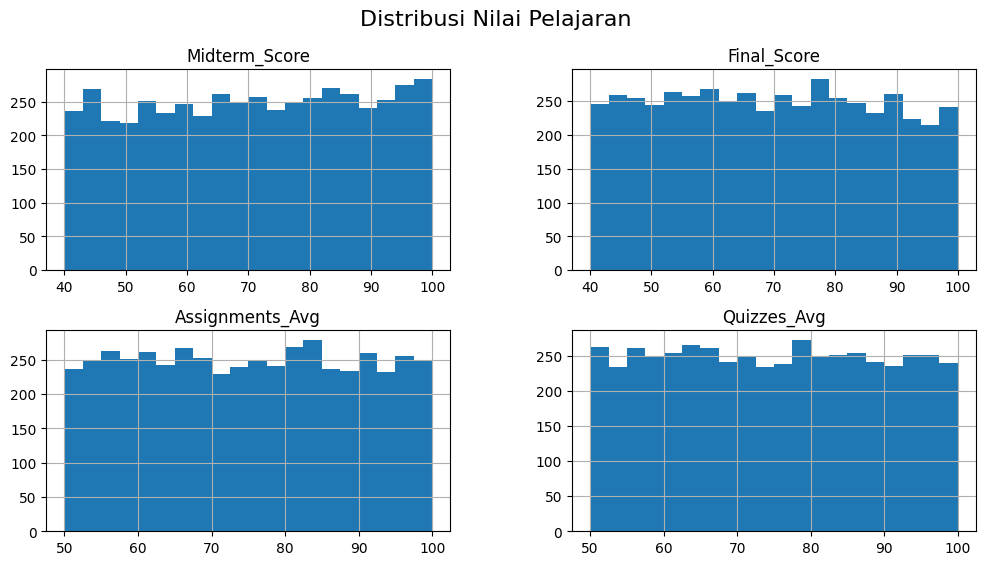

In [20]:
# 📊 Visualisasi Distribusi Nilai
features_plot = ['Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg']
df[features_plot].hist(bins=20, figsize=(12, 6))
plt.suptitle("Distribusi Nilai Pelajaran", fontsize=16)
plt.show()


🔍 Penjelasan:

*   Menampilkan histogram (sebaran nilai) dari 4 jenis skor.
*   Untuk lihat apakah nilai menyebar normal atau tidak



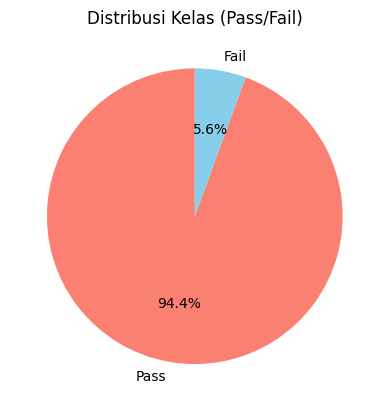

In [21]:
# 🧩 Pie Chart Distribusi Pass/Fail
df["Class"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title("Distribusi Kelas (Pass/Fail)")
plt.ylabel("")
plt.show()

**🔍 Penjelasan:**

Menampilkan pie chart untuk melihat berapa persen siswa lulus dan gagal.



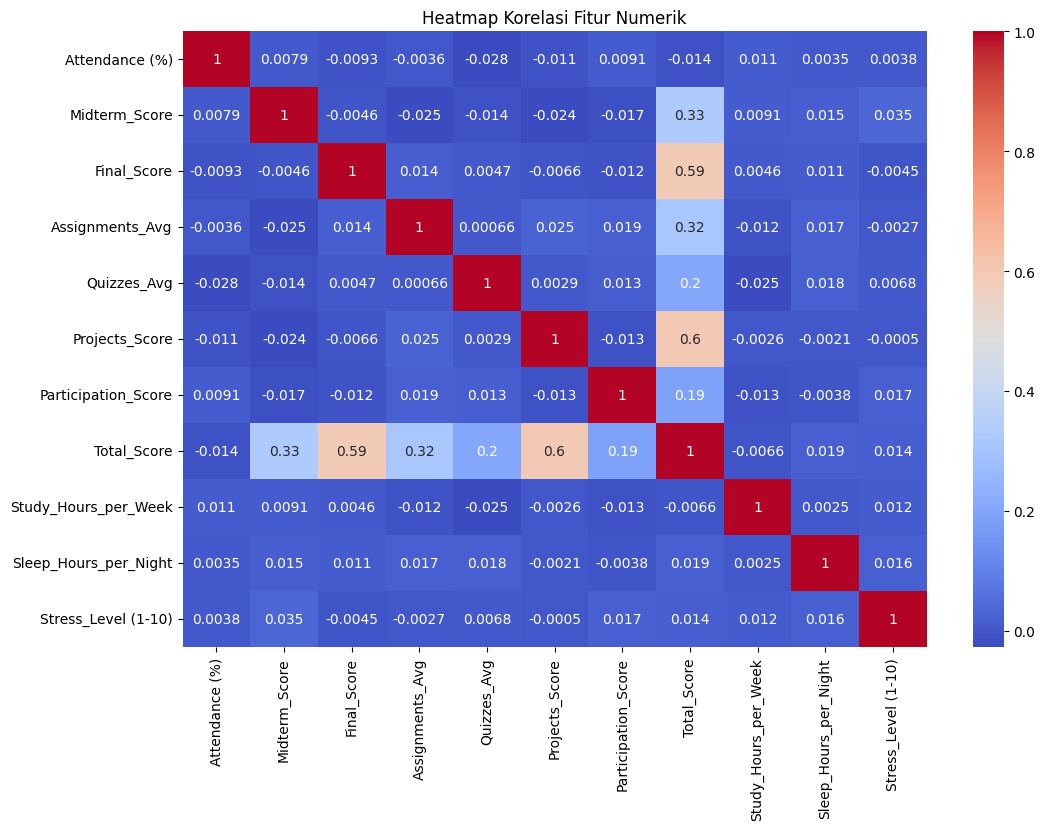

In [22]:
# 📈 Heatmap Korelasi Antar Fitur Numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Class', 'Class_binary']).corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

🔍 Penjelasan:

*   Heatmap untuk visualisasi korelasi antar angka.
*   Warna merah = positif kuat, biru = negatif kuat.


# **🧹 7. Boxplot terhadap kelulusan & Cek Missing Value**

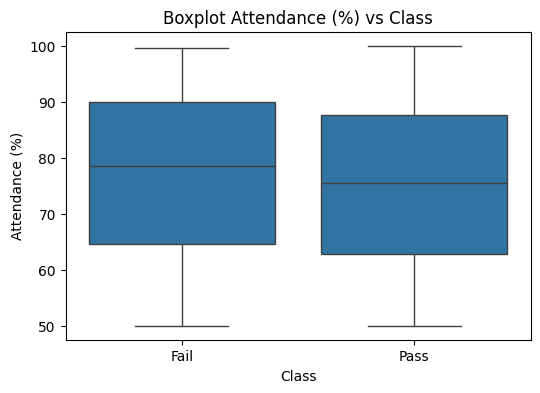

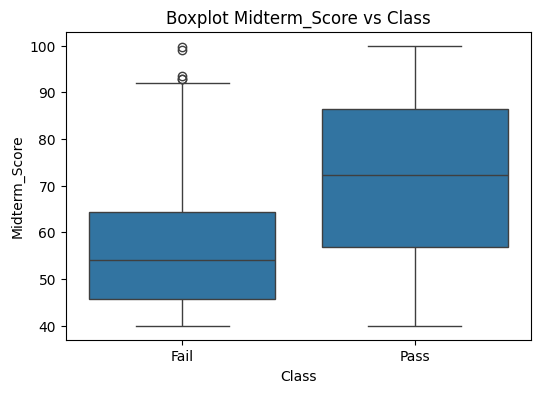

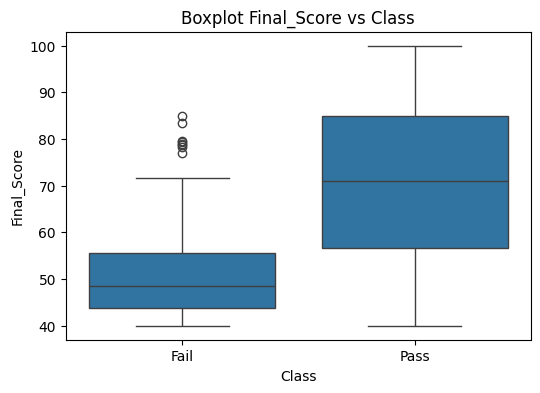

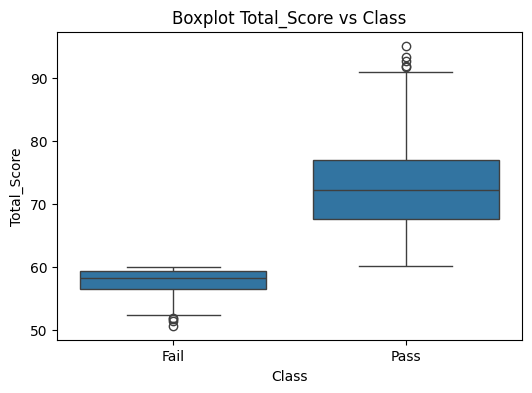


🔍 Cek Missing Values:
Attendance (%)           0
Midterm_Score            0
Final_Score              0
Assignments_Avg          0
Quizzes_Avg              0
Projects_Score           0
Participation_Score      0
Total_Score              0
Study_Hours_per_Week     0
Sleep_Hours_per_Night    0
Stress_Level (1-10)      0
Class                    0
Class_binary             0
dtype: int64


In [24]:
# 📦 Boxplot Fitur terhadap Kelulusan
for col in ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Total_Score']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Boxplot {col} vs Class')
    plt.show()

# 🔍 Cek Missing Values
print("\n🔍 Cek Missing Values:")
print(df.isnull().sum())


**🔍 Penjelasan:**

Mengecek ada atau tidaknya data kosong/null di setiap kolom.

# **🔤 8. Label Encoding Class (Kelulusan)**

In [26]:
# 🔁 Encode Label Target
from sklearn.preprocessing import MinMaxScaler

df['Class'] = df['Class'].map({'Pass': 1, 'Fail': 0})
X = df.drop(columns=['Class', 'Class_binary'])
y = df['Class']


🔍 Penjelasan:

*   Mengubah label kategorikal menjadi nilai numerik tunggal (0/1)
* dan df.drop(columns= untuk memisahkan fitur (X) dari target (y)

# **📏 9. Scaling Data Numerik**

In [27]:
# 🧮 Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**🔍 Penjelasan:**

*   Scaling = menyesuaikan skala data numerik agar dalam range 0–1.


# **💾 10. Gabungkan, Simpan & Download Data Bersih**

In [29]:
# 💾 Gabungkan dan Simpan Dataset Bersih
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Class'] = y.values

# Simpan CSV
cleaned_filename = "cleaned_data.csv"
df_scaled.to_csv(cleaned_filename, index=False)

# Download file
files.download(cleaned_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**🔍 Penjelasan:**

Menyimpan dataset yang sudah bersih dan siap modeling ke file cleaned_data.csv.